Load some library needed through the sentiment analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from nltk.corpus import stopwords

Load in the dataset and add some columns for upvote metrics

In [5]:
# Read the CSV file
odf = pd.read_csv('/Users/apple/Desktop/3320 final project/Reviews.csv') 
# "helpful %":np.where(condition, x, y)
odf['Helpful %'] = np.where(odf['HelpfulnessDenominator'] > 0, 
                            odf['HelpfulnessNumerator'] / odf['HelpfulnessDenominator'], -1)
# “% upvote”: np.cut(x, bins, labels, include_lowest = True)
odf['% Upvote'] = pd.cut(odf['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                         labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], 
                         include_lowest = True)
odf.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty


In [6]:
# groupby(): split the data into groups 
# aggregate(): pass a function or list of function to be applied on a series
df_s = odf.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
# df_s.columns: return the column name
df_s.columns = df_s.columns.get_level_values(1)
df_s.head()

% Upvote,Empty,0-20%,20-40%,40-60%,60-80%,80-100%
Score,,,,,,
1,20326,2338,4649,6586,5838,12531
2,14838,762,1618,3051,2486,7014
3,23485,474,1506,3384,2754,11037
4,46796,116,909,3185,2941,26707
5,198381,432,2275,10312,11060,140661


Text(0.5, 1.0, 'How helpful users find among user scores')

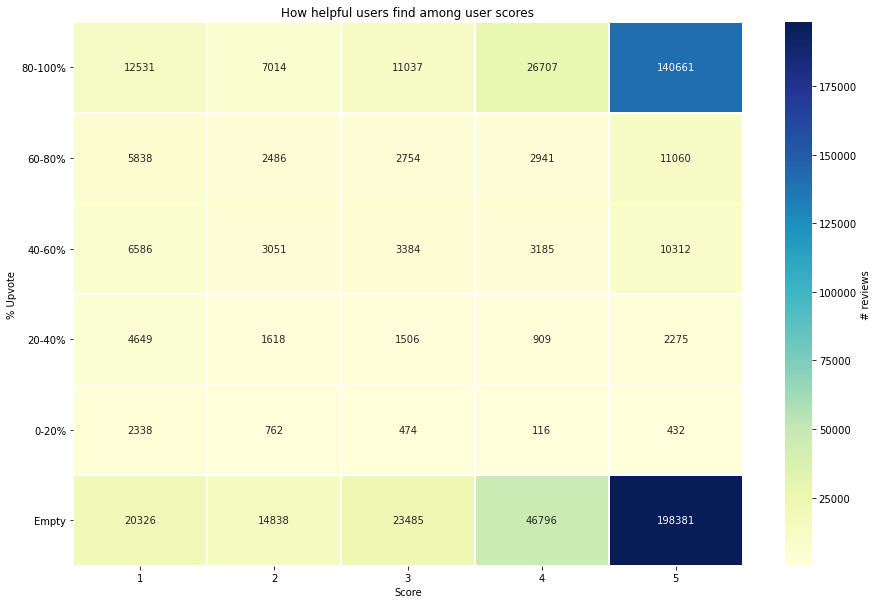

In [7]:
# plt.figure(figsize=(width, height)): Set the Height and Width of a Figure in Matplotlib
fig = plt.figure(figsize=(15,10))
# cmap: The mapping from data values to color space
# linewidths: Width of the lines that will divide each cell
# fmt: String formatting code to use when adding annotations
# cbar_kws: Keyword arguments for matplotlib.figure.Figure.colorbar()
sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, 
            annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
# set the rotation of Y-Axis Tick Labels 0
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')

In [7]:
# Divide the scores into binary class (1 = positive, 0 = negative)
df = odf[odf['Score'] != 3]
X = df['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_dict)

In [8]:
# CountVectorizer: count the occurrences of each word in its vocabulary
# stop_words=’english’: Automatically filter out some words or terms before searching 
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    # fit_transform(): converts the data points.
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    # split training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    # score(): predict accuracy
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    # select the 10 most frequent word coefficients in positive and negative comments
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())
    

# features: 114969
# train records: 394360
# test records: 131454


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.9358254598566799

-Top 20 positive-
        Word  Coefficient
  pleasantly     4.231443
    downside     3.124807
   addicting     2.957420
    drawback     2.668842
   skeptical     2.509512
      resist     2.378750
  economical     2.264488
        whim     2.235129
    soothing     2.217814
     easiest     2.205680
      hooked     2.173000
     welcome     2.083365
   delighted     2.078078
       meets     1.975624
         yay     1.975078
   excellent     1.973635
 wonderfully     1.970140
     worries     1.944431
 exceptional     1.941295
      delish     1.932992

-Top 20 negative-
          Word  Coefficient
         ruins    -2.304709
        lacked    -2.326325
         blech    -2.333292
    unfinished    -2.348778
    unbearable    -2.354965
           ick    -2.418196
    overpowers    -2.487798
   unappealing    -2.530593
   disapointed    -2.556615
       defeats    -2.613164
    returnable    -2.683114
      mediocre    -2.734555
        ripoff   

In [9]:
# the base line accuracy
text_fit(X, y, c, DummyClassifier(),0)

# features: 114969
# train records: 394360
# test records: 131454
Model Accuracy: 0.8437324082949168
